In [94]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def xywh2xyxy(xywh):
    # Convert nx4 boxes from [x, y, w, h] to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    x, y, w, h = xywh
    x1 = (x - w/2)*W
    y1 = (y - h/2)*H
    x2 = (x + w/2)*W
    y2 = (y + h/2)*H
    return [x1, y1, x2, y2]

def plot_one_box(x, img, color=None, label=None, line_thickness=None):
    # Plots one bounding box on image img
    tl = line_thickness
#     color = color or [random.randint(0, 255) for _ in range(3)]

    if label == 0: color = [0, 0, 255] # Đỏ
    elif label == 1: color = [255, 102, 0] # Xanh dương
    elif label == 2: color = [204, 0, 102] # Tím
    elif label == 3: color = [0, 153, 255] # Vàng cam
    elif label == 4: color = [0, 153, 0] # Xanh lá cây đậm
        
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    
    if label and 0:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

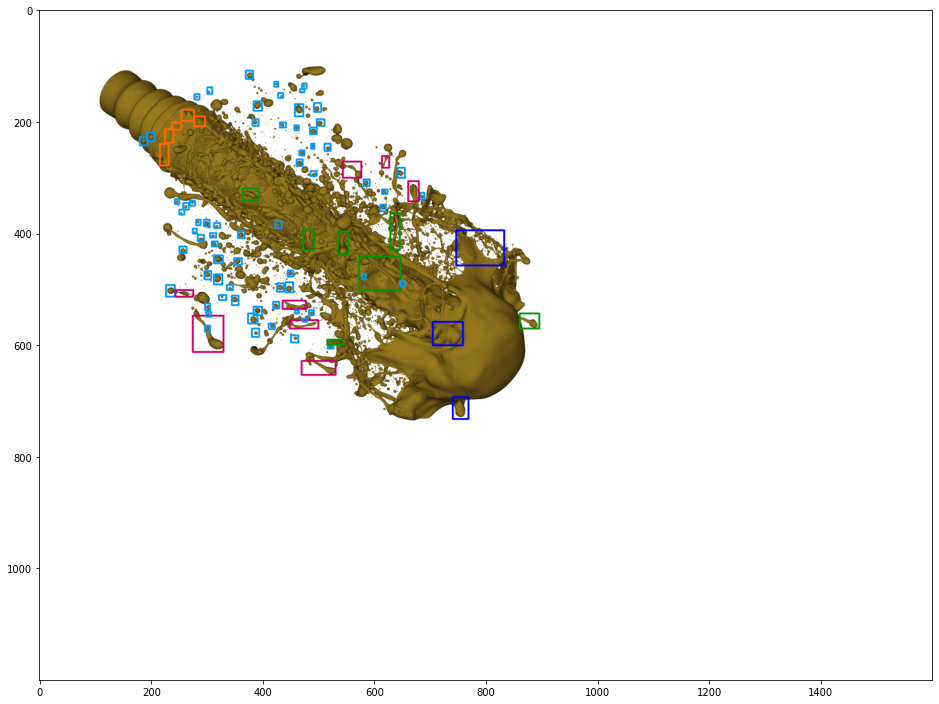

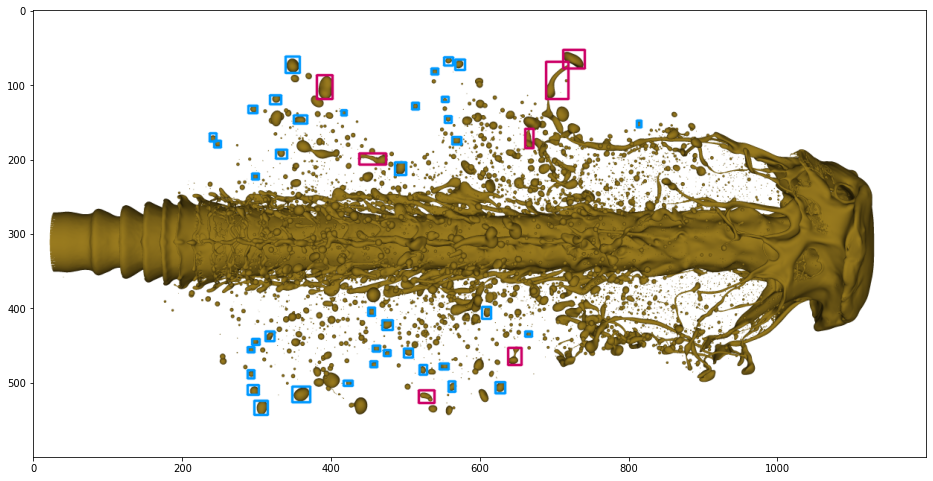

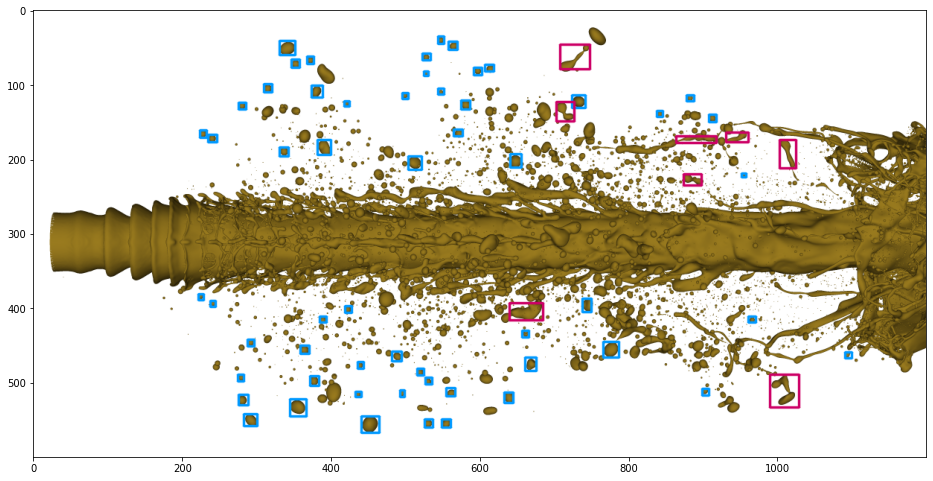

In [96]:
list_img = ["f_01100.bmp", "f_01318.png", "f_01495.png"]

for img_file in list_img:
    img = cv2.imread("ori_img/images/" + img_file)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    H, W, C = img.shape

    count_label = [0, 0, 0, 0, 0]
    label_list = ['bag', 'lobe', 'Detached ligament', 'drop', 'Attached ligament']

    for line in open("ori_img/labels/"+ img_file[:-4] + ".txt"):
        line = line.split()
        label = int(line[0])
        count_label[label] += 1
        xywh = np.array([float(k) for k in line[1:]])
        xyxy = xywh2xyxy(xywh)
        plot_one_box(xyxy, img, label=label, line_thickness=2)

    fig=plt.figure(figsize=(16, 16))
    plt.imshow(img)
    plt.show()
    cv2.imwrite("./"+img_file[:-4]+".jpg", img)
#     print(count_label, np.sum(count_label))
#     fig, ax = plt.subplots() 
#     ax.bar(label_list, count_label) 
#     ax.set_title('Classes visualize') 
#     ax.set_xlabel('Class') 
#     ax.set_ylabel('Number')

(1200, 1600, 3)


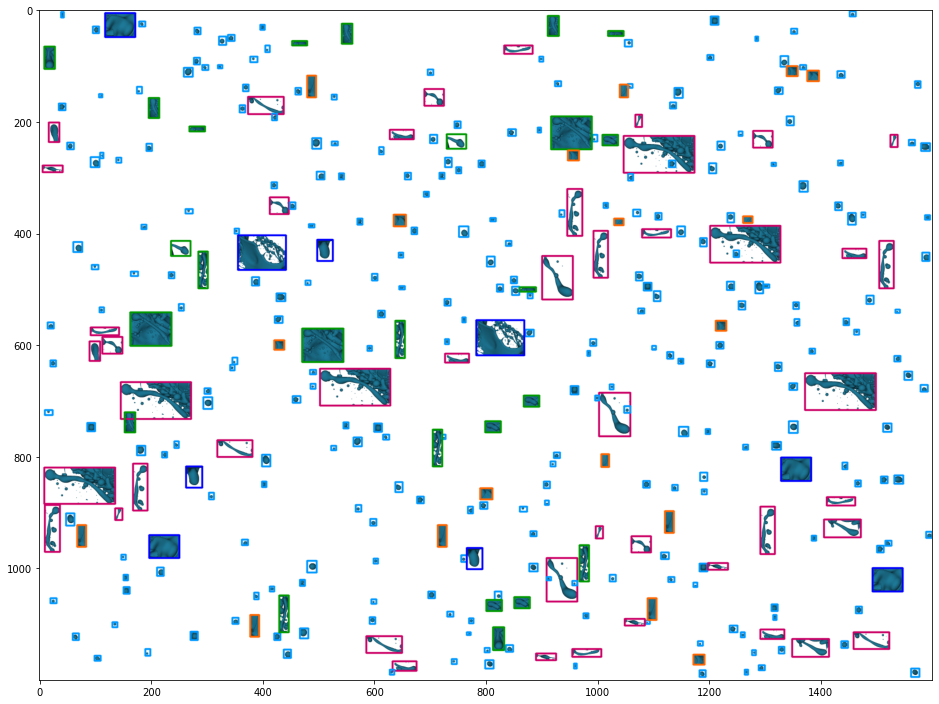

[9, 18, 46, 260, 25] 358


Text(0, 0.5, 'Number')

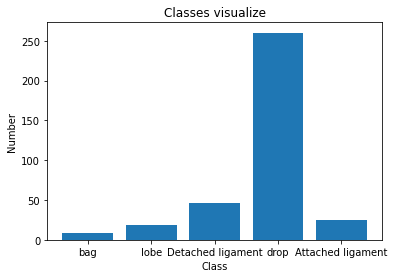

In [85]:
# img = cv2.imread("ori_img/images/f_01100.bmp")
img = cv2.imread("../train/images/22.png")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
H, W, C = img.shape

count_label = [0, 0, 0, 0, 0]
label_list = ['bag', 'lobe', 'Detached ligament', 'drop', 'Attached ligament']

# for line in open("ori_img/labels/f_01100.txt"):
for line in open("../train/labels/22.txt"):
    line = line.split()
    label = int(line[0])
    count_label[label] += 1
    xywh = np.array([float(k) for k in line[1:]])
#     print(xywh)
    xyxy = xywh2xyxy(xywh)
    plot_one_box(xyxy, img, label=label, line_thickness=2)
    
fig=plt.figure(figsize=(16, 16))
plt.imshow(img)
plt.show()
# cv2.imwrite("./1.jpg", img)
print(count_label, np.sum(count_label))

# create a figure and axis 
fig, ax = plt.subplots() 
ax.bar(label_list, count_label) 
ax.set_title('Classes visualize') 
ax.set_xlabel('Class') 
ax.set_ylabel('Number')